# TensorFlow를 활용한 로지스틱 회귀 실습

이 노트북에서는 TensorFlow를 사용하여 간단한 로지스틱 회귀문제를 풀어봅니다.
여기서는 iris 데이터셋을 사용하여 꽃의 종류를 분류하는 예제를 다룹니다.

## 주요 단계
1. 데이터 불러오기 및 전처리
2. 모델 정의 (Dense Layer)
3. 손실 함수 및 최적화 방법 설정
4. 학습 진행 및 시각화


In [8]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
print(tf.__version__)

2.20.0


## 1. 데이터 불러오기 및 전처리

In [9]:
# ----------------------
# 1. 데이터 불러오기
# ----------------------
iris = load_iris()
X = iris.data[:, :2]  # 꽃받침 길이, 꽃받침 너비 (2개 feature만 사용해서 시각화 쉽게)
y = (iris.target == 0).astype(np.float32)  # Setosa = 1, Others = 0

print("X shape:", X.shape, "y shape:", y.shape)

# train/test 분리
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 표준화
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X shape: (150, 2) y shape: (150,)


## 2. 모델 정의

In [10]:
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(shape=(2,)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3 (12.00 B)

 Trainable params: 3 (12.00 B)

 Non-trainable params: 0 (0.00 B)

## 3. 모델 컴파일
- 손실 함수: MSE (Mean Squared Error)
- 최적화 방법: SGD (Stochastic Gradient Descent)

In [11]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1),
              loss="binary_crossentropy",
              metrics=["accuracy"])

## 4. 모델 학습

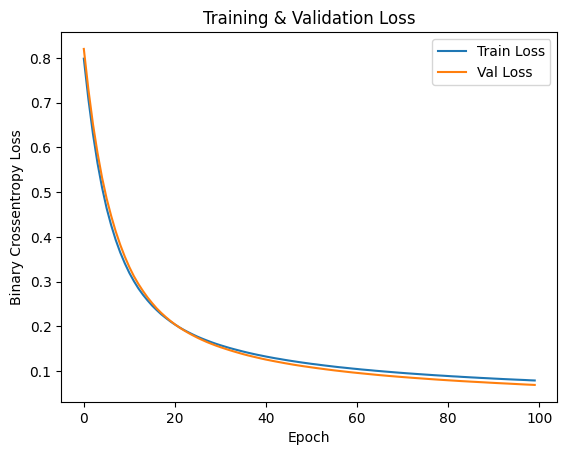

In [12]:
history = model.fit(X_train, y_train,
                    epochs=100,
                    validation_data=(X_test, y_test),
                    verbose=0)

# ----------------------
# 5. 학습 곡선 확인
# ----------------------
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Val Loss")
plt.xlabel("Epoch")
plt.ylabel("Binary Crossentropy Loss")
plt.legend()
plt.title("Training & Validation Loss")
plt.show()

## 5. 결과 확인

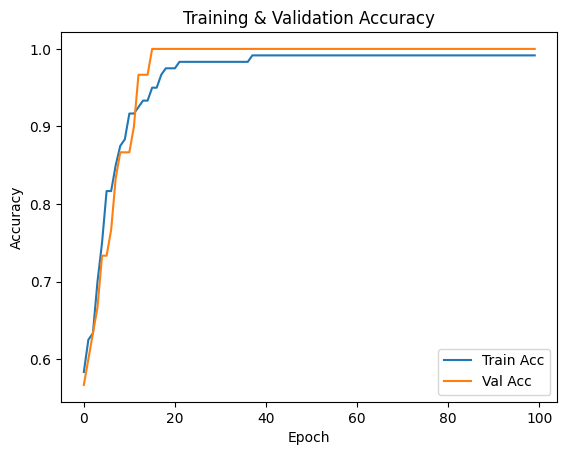

테스트 정확도: 1.000


In [13]:
plt.plot(history.history['accuracy'], label="Train Acc")
plt.plot(history.history['val_accuracy'], label="Val Acc")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training & Validation Accuracy")
plt.show()

# ----------------------
# 6. 모델 평가
# ----------------------
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"테스트 정확도: {acc:.3f}")

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


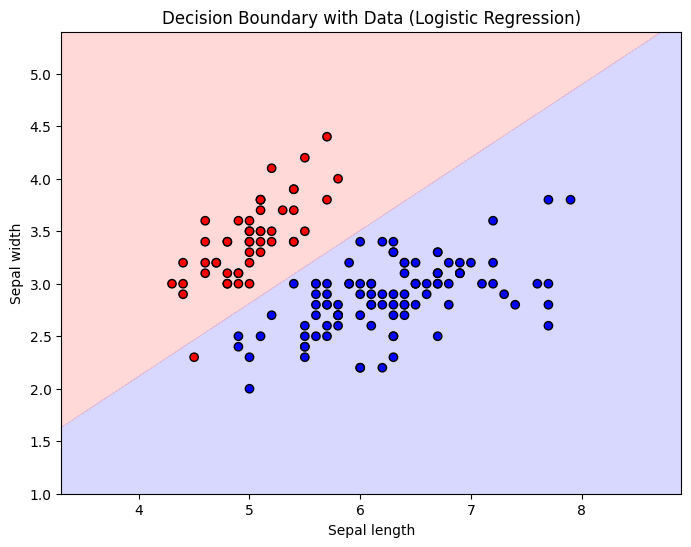

In [14]:
# ----------------------
# 결정 경계 + 전체 데이터 시각화
# ----------------------
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

grid = np.c_[xx.ravel(), yy.ravel()]
grid = scaler.transform(grid)
probs = model.predict(grid).reshape(xx.shape)

plt.figure(figsize=(8, 6))

# 결정 경계 (배경 색)
plt.contourf(xx, yy, probs, levels=[0, 0.5, 1], alpha=0.3, cmap="bwr")

# 전체 데이터 산점도 (훈련+테스트)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="bwr", edgecolors="k")

plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.title("Decision Boundary with Data (Logistic Regression)")
plt.show()

## 생각해보기
- 로지스틱 회귀 모델과 선형 회귀 모델의 차이는?

선형은 회귀, 로지스틱은 분류

- Learning Rate(학습률)의 역할은 무엇인가요?
- 너무 크거나 너무 작은 학습률을 사용하면 어떤 일이 발생하나?

LR은 경사하강법에서 loss값을 0으로 가기위한 Epoch대비 최소 단위 입니다.
너무크면 0을 지나칠 수 있고, 적으면 학습 epoch를 늘려야합니다.